In [87]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import mpl_finance as mpf
import matplotlib.dates as mdates
from matplotlib import style
style.use('ggplot')

In [37]:
df = pd.read_csv('data/aapl.csv', parse_dates=True, index_col=0)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,3.454628
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,3.163368
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,3.209661
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.931901
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600.0,3.070781
...,...,...,...,...,...,...
2020-08-03,446.549988,431.570007,432.799988,435.750000,77037800.0,434.965759
2020-08-04,443.160004,433.549988,436.529999,438.660004,43267900.0,437.870514
2020-08-05,441.570007,435.589996,437.510010,440.250000,30498000.0,439.457642


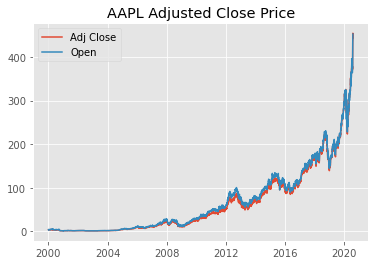

In [38]:
plt.title('AAPL Adjusted Close Price')
x = plt.x_axis=np.array(df.index)
y_close = plt.y_axis=np.array(df['Adj Close'])
y_open = plt.y_axis=np.array(df['Open'])
plt.plot(x, y_close, label='Adj Close')
plt.plot(x, y_open, label='Open')
plt.legend()
plt.show()

In [39]:
# 100ma - 100 moving average, takes the average price of todays current price and the prices 
# of the 99 prior days
df['100ma'] = df['Adj Close'].rolling(window=100).mean()

In [41]:
df.fillna(0, inplace=True)

In [42]:
df

,High,Low,Open,Close,Volume,Adj Close,100ma
Date,,,,,,,
2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,3.454628,0.000000
2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,3.163368,0.000000
2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,3.209661,0.000000
2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.931901,0.000000
2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600.0,3.070781,0.000000
...,...,...,...,...,...,...,...
2020-08-03,446.549988,431.570007,432.799988,435.750000,77037800.0,434.965759,317.610567
2020-08-04,443.160004,433.549988,436.529999,438.660004,43267900.0,437.870514,319.518129
2020-08-05,441.570007,435.589996,437.510010,440.250000,30498000.0,439.457642,321.145499


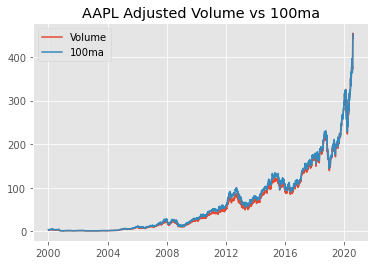

In [43]:
plt.title('AAPL Adjusted Volume vs 100ma')
x = plt.x_axis=np.array(df.index)
y_vol = plt.y_axis=np.array(df['Volume'])
y_100ma = plt.y_axis=np.array(df['100ma'])
plt.plot(x, y_close, label='Volume')
plt.plot(x, y_open, label='100ma')
plt.legend()
plt.show()

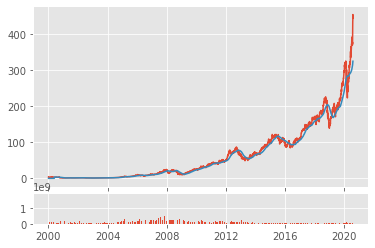

In [73]:
# using subplots 
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])



plt.show()


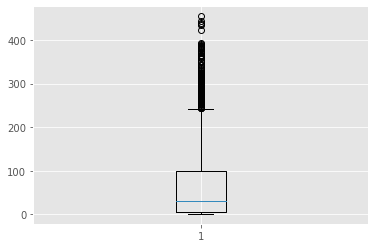

In [94]:
plt.boxplot(df['Adj Close'])
plt.show()